In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/oasis_longitudinal.csv')
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


## EDA ##

In [78]:
# basic EDA
print("shape:", df.shape)
print('data types:\n', df.dtypes)
print(df.describe())

shape: (373, 15)
data types:
 Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object
            Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  354.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.460452   
std      0.922843   635.485118    7.640957    2.876339    1.134005   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000

In [79]:
# check for missing values
print('Missing values in each column:')
print(df.isnull().sum())

Missing values in each column:
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [80]:
# describe potential target variable
target1 = df['Group'] # categorical
print(target1.value_counts())
# can add a bar plot of target to help audience understand balance of dataset

target2 = df['MMSE'] # continuous
print(target2.describe())

Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64
count    371.000000
mean      27.342318
std        3.683244
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64


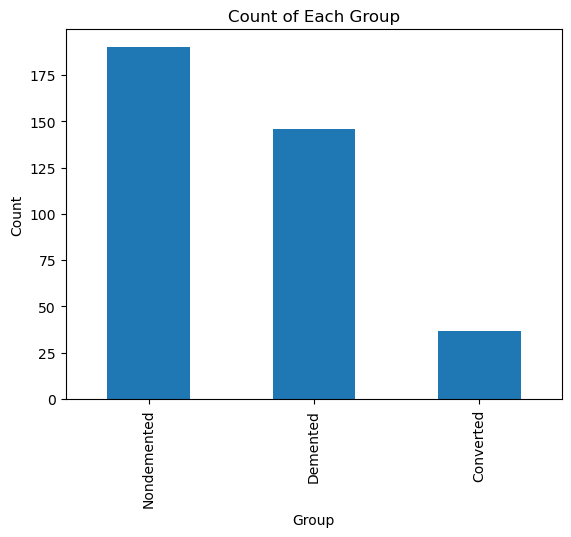

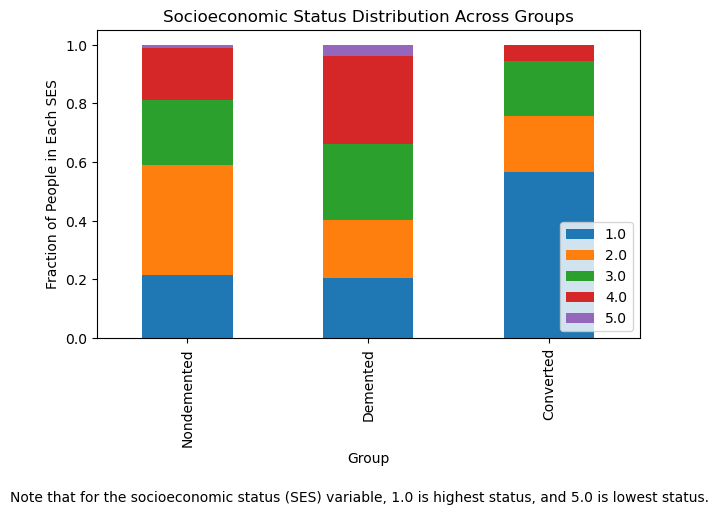

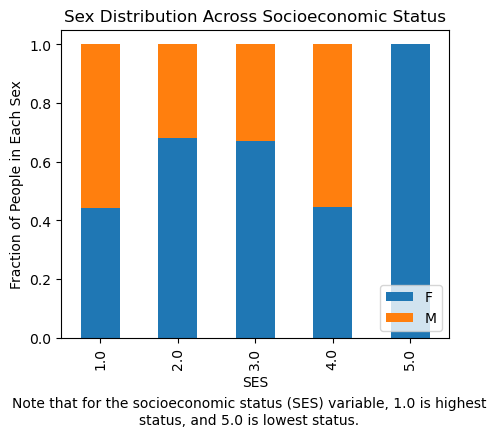

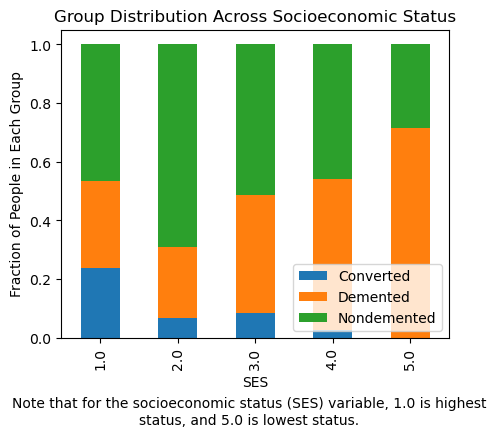

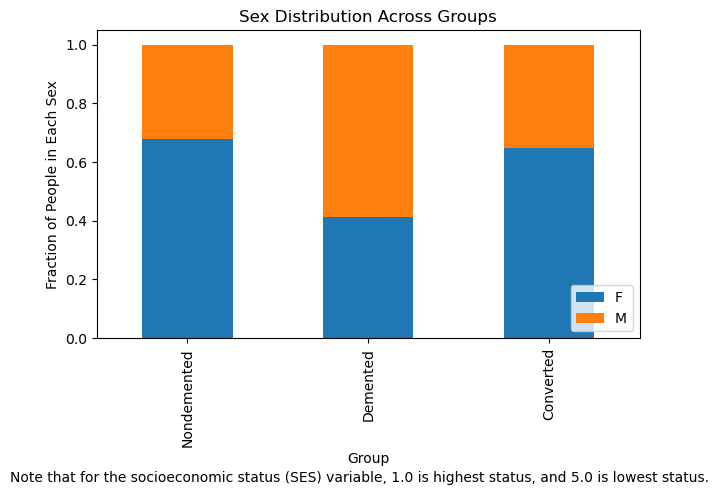

In [102]:
import os

# Ensure the directory exists
os.makedirs("../figures/EDA", exist_ok=True)

# plot Group
group_counts = df['Group'].value_counts()

# plot the bar chart
group_counts.plot(kind='bar')
plt.title('Count of Each Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.savefig("../figures/EDA/group_counts.png", format="png", dpi=300)
plt.show()

# plot Group vs. SES
count_matrix = df.groupby(['Group', 'SES']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
group_order = ['Nondemented', 'Demented', 'Converted']
count_matrix_norm = count_matrix_norm.reindex(group_order)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(7,4))
plt.ylabel('Fraction of People in Each SES')
plt.legend(loc=4)
plt.figtext(0.5, -0.3, 'Note that for the socioeconomic status (SES) variable, 1.0 is highest status, and 5.0 is lowest status.',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.title("Socioeconomic Status Distribution Across Groups")
plt.savefig("../figures/EDA/group_vs_ses.png", format="png", dpi=300)
plt.show()

# plot SES vs. Sex
count_matrix = df.groupby(['SES', 'M/F']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
# group_order = ['Nondemented', 'Demented', 'Converted']
# count_matrix_norm = count_matrix_norm.reindex(group_order)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5,4))
plt.ylabel('Fraction of People in Each Sex')
plt.legend(loc=4)
plt.figtext(0.5, -0.1, 'Note that for the socioeconomic status (SES) variable, 1.0 is highest status, and 5.0 is lowest status.',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.title("Sex Distribution Across Socioeconomic Status")
plt.savefig("../figures/EDA/ses_vs_sex.png", format="png", dpi=300)
plt.show()

# plot SES vs. Group
count_matrix = df.groupby(['SES', 'Group']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
# group_order = ['Nondemented', 'Demented', 'Converted']
# count_matrix_norm = count_matrix_norm.reindex(group_order)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5,4))
plt.ylabel('Fraction of People in Each Group')
plt.legend(loc=4)
plt.figtext(0.5, -0.1, 'Note that for the socioeconomic status (SES) variable, 1.0 is highest status, and 5.0 is lowest status.',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.title("Group Distribution Across Socioeconomic Status")
plt.savefig("../figures/EDA/ses_vs_group.png", format="png", dpi=300)
plt.show()

# plot Group vs. Sex
count_matrix = df.groupby(['Group', 'M/F']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
group_order = ['Nondemented', 'Demented', 'Converted']
count_matrix_norm = count_matrix_norm.reindex(group_order)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(7,4))
plt.ylabel('Fraction of People in Each Sex')
plt.legend(loc=4)
plt.figtext(0.5, -0.25, 'Note that for the socioeconomic status (SES) variable, 1.0 is highest status, and 5.0 is lowest status.',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.title("Sex Distribution Across Groups")
plt.savefig("../figures/EDA/group_vs_sex.png", format="png", dpi=300)
plt.show()

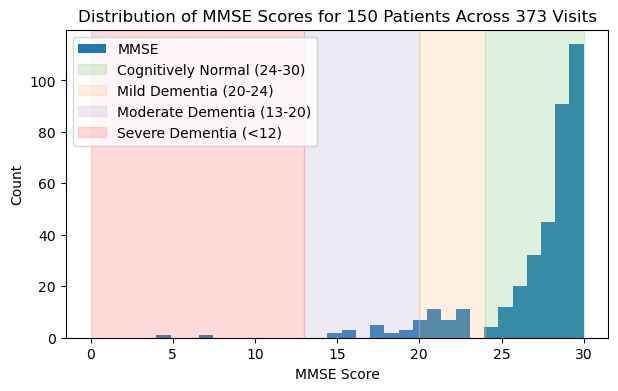

In [82]:
# plot MMSE
plt.figure(figsize=(7,4))
df['MMSE'].plot.hist(bins = 30)
plt.xlabel('MMSE Score')
plt.ylabel('Count')
plt.title('Distribution of MMSE Scores for 150 Patients Across 373 Visits')
plt.axvspan(24, 30, color='#7FC97F', alpha=0.25, label='Cognitively Normal (24-30)')
plt.axvspan(20, 24, color='#FDC086', alpha=0.25, label='Mild Dementia (20-24)')
plt.axvspan(13, 20, color='#BEAED4', alpha=0.25, label='Moderate Dementia (13-20)')
plt.axvspan(0, 13, color='#FF6F69', alpha=0.25, label='Severe Dementia (<12)')
plt.legend(loc='upper left')
plt.savefig("../figures/EDA/mmse_distribution.png", format="png", dpi=300)
plt.show()

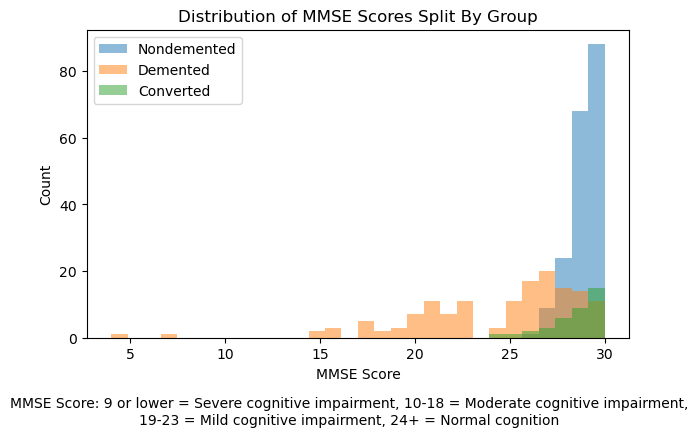

In [83]:
# plot MMSE vs. Group
categories = df['Group'].unique()
bin_range = (df['MMSE'].min(),df['MMSE'].max())

plt.figure(figsize=(7,4))

for c in categories:
    plt.hist(df[df['Group']==c]['MMSE'],alpha=0.5,label=c,range=bin_range,bins=30)
plt.legend()
plt.ylabel('Count')
plt.xlabel('MMSE Score')
plt.title('Distribution of MMSE Scores Split By Group')
plt.figtext(0.5, -0.1, 'MMSE Score: 9 or lower = Severe cognitive impairment, 10-18 = Moderate cognitive impairment, 19-23 = Mild cognitive impairment, 24+ = Normal cognition',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig("../figures/EDA/mmse_vs_group.png", format="png", dpi=300)
plt.show()

(4.0, 30.0)
[1 2 3 4 5]


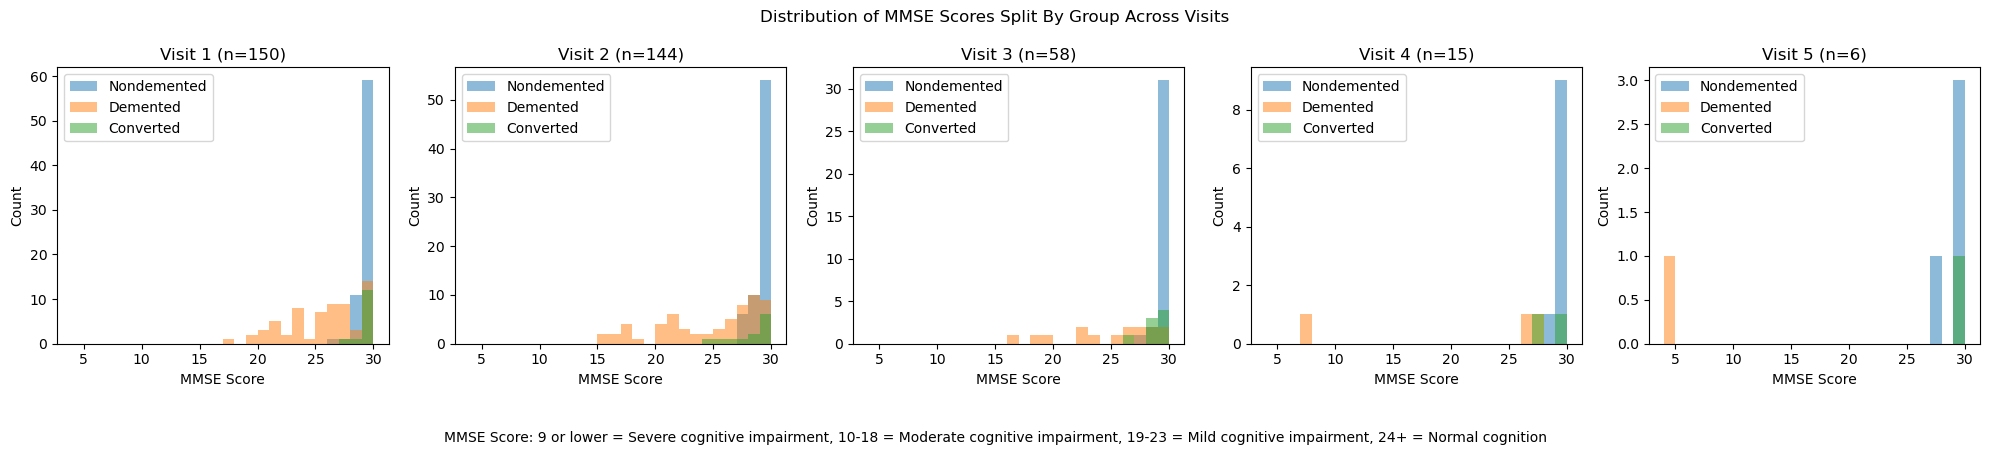

In [84]:
# plot MMSE vs. Group, split on Visit 
groups = df['Group'].unique()
bin_range = (df['MMSE'].min(),df['MMSE'].max())
print(bin_range)

visits = df['Visit'].unique()
print(visits)

plt.figure(figsize=(20,4))
for v in visits:
    plt.subplot(1,5,v)
    curr_entries = df[df['Visit'] == v]
    num_people = curr_entries.shape[0]
    for g in groups:
        plt.hist(curr_entries[curr_entries['Group']==g]['MMSE'],alpha=0.5,label=g,range=bin_range,bins=30-4)
    plt.legend()
    plt.ylabel('Count')
    plt.xlabel('MMSE Score')
    plt.title(f'Visit {v} (n={num_people})')
plt.suptitle('Distribution of MMSE Scores Split By Group Across Visits')
plt.figtext(0.5, -0.1, 'MMSE Score: 9 or lower = Severe cognitive impairment, 10-18 = Moderate cognitive impairment, 19-23 = Mild cognitive impairment, 24+ = Normal cognition',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig("../figures/EDA/mmse_vs_group_by_visit.png", format="png", dpi=300)
plt.tight_layout()
plt.show()

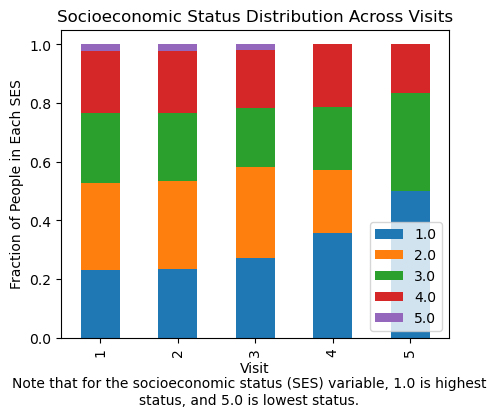

In [85]:
# plot SES vs. # of Visits
count_matrix = df.groupby(['Visit', 'SES']).size().unstack()
# print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
# print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5,4))
plt.ylabel('Fraction of People in Each SES')
plt.legend(loc=4)
plt.figtext(0.5, -0.05, 'Note that for the socioeconomic status (SES) variable, 1.0 is highest status, and 5.0 is lowest status.',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig("../figures/EDA/ses_vs_visits.png", format="png", dpi=300)
plt.title("Socioeconomic Status Distribution Across Visits")
plt.show()

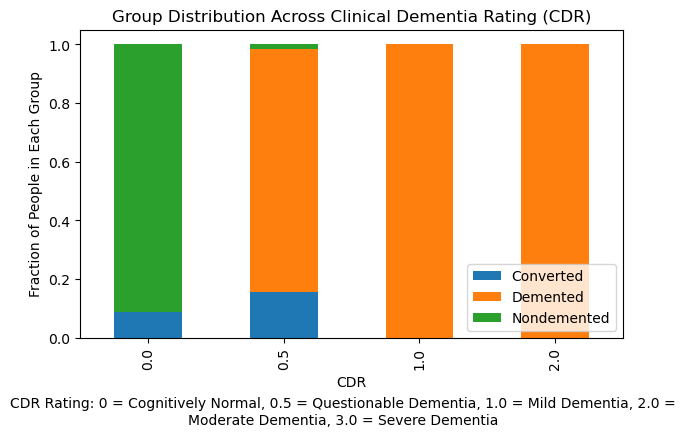

In [86]:
# plot CDR vs. Group
count_matrix = df.groupby(['CDR', 'Group']).size().unstack()
# print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
# print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True, figsize=(7,4))
plt.ylabel('Fraction of People in Each Group')
plt.legend(loc=4)
plt.figtext(0.5, -0.1, 'CDR Rating: 0 = Cognitively Normal, 0.5 = Questionable Dementia, 1.0 = Mild Dementia, 2.0 = Moderate Dementia, 3.0 = Severe Dementia',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig("../figures/EDA/cdr_vs_group.png", format="png", dpi=300)
plt.title("Group Distribution Across Clinical Dementia Rating (CDR)")
plt.show()

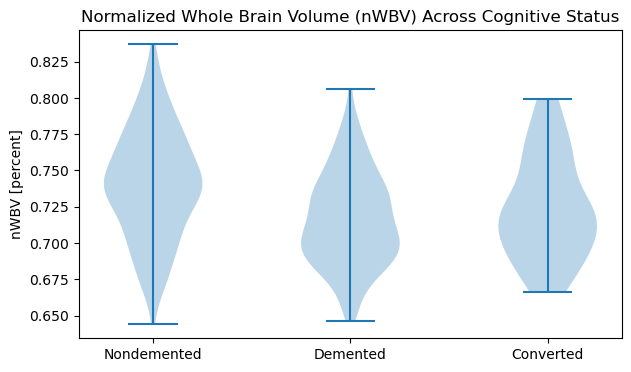

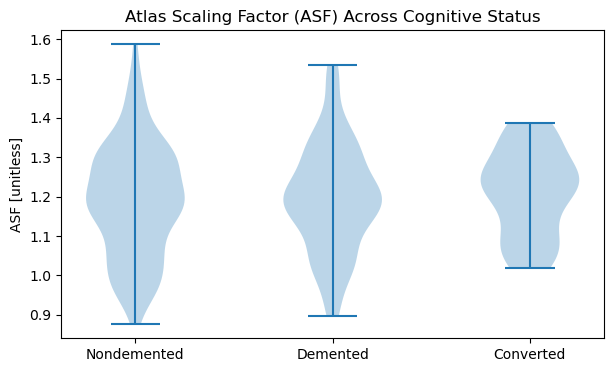

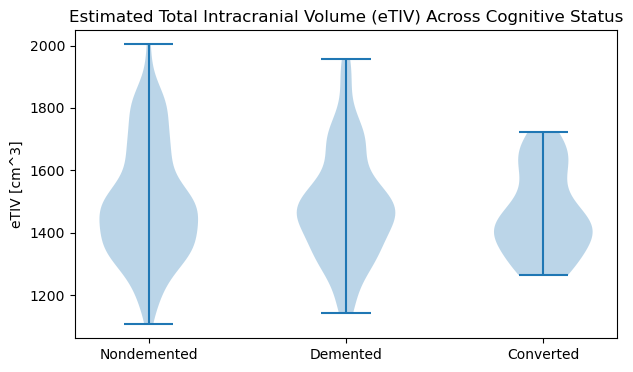

In [87]:
# plot Group vs. eTIV and nWBV and ASF
# nWBV
dataset = [df[df['Group']== 'Nondemented']['nWBV'].values,
           df[df['Group']== 'Demented']['nWBV'].values,
           df[df['Group']== 'Converted']['nWBV'].values]

plt.figure(figsize=(7,4))

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['Nondemented','Demented', 'Converted'])
plt.ylabel('nWBV [percent]')
plt.title('Normalized Whole Brain Volume (nWBV) Across Cognitive Status')
plt.savefig("../figures/EDA/nwbv_vs_group.png", format="png", dpi=300)
plt.show()

# ASF
dataset = [df[df['Group']== 'Nondemented']['ASF'].values,
           df[df['Group']== 'Demented']['ASF'].values,
           df[df['Group']== 'Converted']['ASF'].values]

plt.figure(figsize=(7,4))

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['Nondemented','Demented', 'Converted'])
plt.ylabel('ASF [unitless]')
plt.title('Atlas Scaling Factor (ASF) Across Cognitive Status')
plt.savefig("../figures/EDA/asf_vs_group.png", format="png", dpi=300)
plt.show()

# eTIV
dataset = [df[df['Group']== 'Nondemented']['eTIV'].values,
           df[df['Group']== 'Demented']['eTIV'].values,
           df[df['Group']== 'Converted']['eTIV'].values]

plt.figure(figsize=(7,4))

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['Nondemented','Demented', 'Converted'])
plt.ylabel('eTIV [cm^3]')
plt.title('Estimated Total Intracranial Volume (eTIV) Across Cognitive Status')
plt.savefig("../figures/EDA/etiv_vs_group.png", format="png", dpi=300)
plt.show()

          MR Delay       Age      EDUC      MMSE      eTIV      nWBV       ASF
MR Delay  1.000000  0.205357  0.051630  0.065844  0.119624 -0.105586 -0.123545
Age       0.205357  1.000000 -0.027886  0.055612  0.042348 -0.518359 -0.035067
EDUC      0.051630 -0.027886  1.000000  0.194884  0.257015 -0.012200 -0.241752
MMSE      0.065844  0.055612  0.194884  1.000000 -0.032084  0.341912  0.040052
eTIV      0.119624  0.042348  0.257015 -0.032084  1.000000 -0.210122 -0.988877
nWBV     -0.105586 -0.518359 -0.012200  0.341912 -0.210122  1.000000  0.213476
ASF      -0.123545 -0.035067 -0.241752  0.040052 -0.988877  0.213476  1.000000


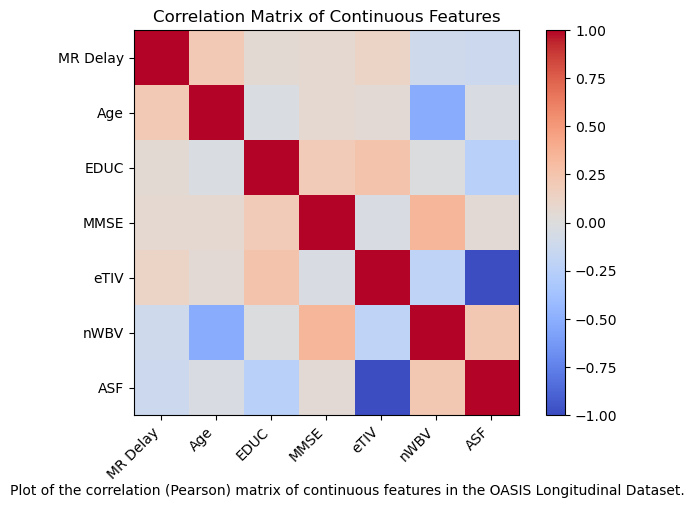

In [88]:
# corr matrix of features
cont_ftrs = ['MR Delay', 'Age', 'EDUC', 'MMSE', 'eTIV', 'nWBV', 'ASF']
df_cont_ftrs = df[cont_ftrs]
corr_mat = df_cont_ftrs.corr(method='pearson')
print(corr_mat)

# plot
plt.figure(figsize=(7,5))
plt.imshow(corr_mat, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(ticks=np.arange(len(df_cont_ftrs.columns)), labels=df_cont_ftrs.columns, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(df_cont_ftrs.columns)), labels=df_cont_ftrs.columns)
plt.colorbar()
plt.title('Correlation Matrix of Continuous Features')
plt.figtext(0.5, -0.05, 'Plot of the correlation (Pearson) matrix of continuous features in the OASIS Longitudinal Dataset.',
            wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig("../figures/EDA/ftr_corr_mat.png", format="png", dpi=300)
plt.show()

<Figure size 700x500 with 0 Axes>

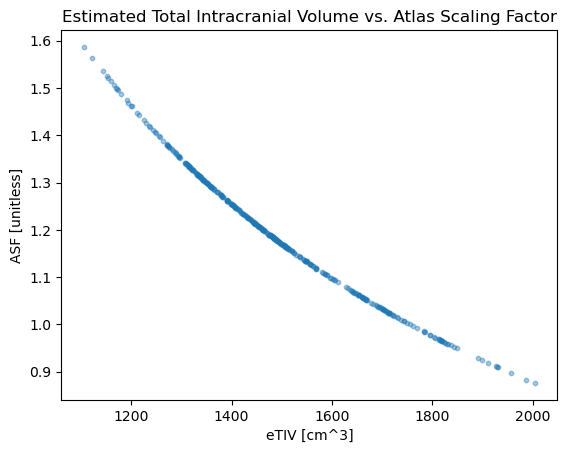

In [89]:
# plot eTIV and ASF
plt.figure(figsize=(7,5))
df.plot.scatter('eTIV','ASF',alpha=0.4,s=10) 
plt.xlabel('eTIV [cm^3]')
plt.ylabel('ASF [unitless]')
plt.title('Estimated Total Intracranial Volume vs. Atlas Scaling Factor')
plt.savefig("../figures/EDA/etiv_vs_asf.png", format="png", dpi=300)
plt.show()

## Data Cleaning ##

In [90]:
# drop Hand column since all R and MRI ID
hand_types = df['Hand'].unique()
print(hand_types)

df_cleaned = df.drop(columns=['Hand','MRI ID'])
print(df_cleaned.columns)

['R']
Index(['Subject ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Age', 'EDUC', 'SES',
       'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')


## Splitting the Data (Experimenting w/ Stratified Group KFold) ##

In [91]:
X = df_cleaned.drop(columns = ['Group', 'Subject ID'])
print("Remaining columns:", X.columns)
y = df_cleaned['Group']
subject_ids = df_cleaned['Subject ID']
print("\nNumber of Subjects:", (df_cleaned['Subject ID'].unique()).size)
stratify = df_cleaned['Group']

# Find number of subjects per group
subj_per_group = df_cleaned.groupby("Group")["Subject ID"].nunique()
print("\nNumber of Subjects in Each Group:")
print(subj_per_group)

Remaining columns: Index(['Visit', 'MR Delay', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF'],
      dtype='object')

Number of Subjects: 150

Number of Subjects in Each Group:
Group
Converted      14
Demented       64
Nondemented    72
Name: Subject ID, dtype: int64


### 5 outer splits + 1 inner split ###

In [92]:
from sklearn.model_selection import StratifiedGroupKFold

# Set random_state to ensure reproducibility
random_state = 29

# Initialize the outer StratifiedGroupKFold
n_splits = 5
outer_split = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

folds = []

# print(X.shape)
# print(y.shape)
# print(subject_ids.shape)

# Loop over each fold
for fold_number, (train_val_idx, test_idx) in enumerate(outer_split.split(X, y, groups=subject_ids)):

      print(f"\nFOLD {fold_number + 1}")

      # Split data into training + val and test sets
      X_train_val = X.iloc[train_val_idx]
      y_train_val = y.iloc[train_val_idx]
      # print(groups)
      # print(subject_ids.shape)
      subject_ids_train_val = subject_ids.iloc[train_val_idx] # holds groups that are represented in the train + val sets
      stratify_train_val = stratify.iloc[train_val_idx] # holds labels of subjects in the train + val sets
      print(stratify_train_val.value_counts())
      # print(subject_ids_train_val.shape)

      X_test = X.iloc[test_idx]
      y_test = y.iloc[test_idx]
      # print("whattttt:", X_train_val.shape, X_test.shape)
      # groups_test = groups.iloc[test_idx]

      # Further split training + val set
      # Use StratifiedGroupShuffleSplit to maintain stratification and grouping
      inner_split = StratifiedGroupKFold(n_splits=4, shuffle=True, random_state=random_state) # n_splits=4 to set 3:1 ratio for train:val

      # Get the first split from the inner split
      for train_idx_rel, val_idx_rel in inner_split.split(X_train_val, y_train_val, groups=subject_ids_train_val):
            break # break after the first split

      # Map relative indices back to original indices for train and val
      train_idx = train_val_idx[train_idx_rel]
      val_idx = train_val_idx[val_idx_rel]

      # Get unique users (groups) in each set
      train_users = subject_ids.iloc[train_idx].unique()
      val_users = subject_ids.iloc[val_idx].unique()
      test_users = subject_ids.iloc[test_idx].unique()

      # Check that the grouping process worked
      if not set(train_users).isdisjoint(val_users): # if not disjoint
            raise ValueError("Duplicates found in train and val.")

      if not set(train_users).isdisjoint(test_users): # if not disjoint
            raise ValueError("Duplicates found in train and test.")
      
      if not set(val_users).isdisjoint(test_users):
            raise ValueError("Duplicates found in val and test.")

      # # Print the users in each set
      # print(f"Users in TRAIN: {train_users.tolist()}")
      # print(f"Users in VALIDATION: {val_users.tolist()}")
      # print(f"Users in TEST: {test_users.tolist()}")

      # Check that stratified split worked
      print("TRAIN INDICES:", train_idx[:].tolist(),
            "\nVALIDATION INDICES:", val_idx[:].tolist(),
            "\nTEST INDICES:", test_idx[:].tolist())

      # Calculate the sizes as fractions of the total dataset
      total_size = len(df)
      train_size = len(train_idx) / total_size
      val_size = len(val_idx) / total_size
      test_size = len(test_idx) / total_size

      print(f"Size of TRAIN: {train_size:.3f},",
            f"Size of VALIDATION: {val_size:.3f},",
            f"Size of TEST: {test_size:.3f}")

      # Calculate the percentage breakdown of 'Groups' in each set
      group_distribution_train_and_val = stratify.iloc[np.concatenate((train_idx, val_idx))].value_counts(normalize=True) * 100
      group_distribution_train = stratify.iloc[train_idx].value_counts(normalize=True) * 100
      group_distribution_val = stratify.iloc[val_idx].value_counts(normalize=True) * 100
      group_distribution_test = stratify.iloc[test_idx].value_counts(normalize=True) * 100

      # Print the percentage breakdown of 'Groups' in each set
      print("\nPercentage breakdown of 'Groups' in TRAIN AND VALIDATION:")
      print(group_distribution_train_and_val.to_string()) 

      print("\nPercentage breakdown of 'Groups' in TRAIN:")
      print(group_distribution_train.to_string())

      print("\nPercentage breakdown of 'Groups' in VALIDATION:")
      print(group_distribution_val.to_string())

      print("\nPercentage breakdown of 'Groups' in TEST:")
      print(group_distribution_test.to_string())

      # # Split the data
      # X_train = X.iloc[train_idx]
      # y_train = y.iloc[train_idx]

      # X_val = X.iloc[val_idx]
      # y_val = y.iloc[val_idx]

      # X_test = X.iloc[test_idx]
      # y_test = y.iloc[test_idx]

      # Save indices in folds
      folds.append({
        'train_idx': train_idx,
        'val_idx': val_idx,
        'test_idx': test_idx,
      })


FOLD 1
Group
Nondemented    157
Demented       117
Converted       27
Name: count, dtype: int64
TRAIN INDICES: [2, 3, 4, 5, 6, 7, 8, 9, 15, 16, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 45, 46, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 66, 67, 72, 73, 74, 75, 76, 77, 78, 79, 80, 84, 85, 93, 94, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 110, 111, 112, 113, 118, 119, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 144, 145, 146, 149, 150, 151, 152, 153, 156, 157, 158, 159, 160, 166, 167, 168, 169, 170, 171, 172, 173, 177, 178, 183, 184, 189, 190, 191, 192, 193, 194, 195, 198, 199, 200, 201, 202, 205, 206, 207, 208, 209, 210, 211, 218, 219, 220, 223, 224, 227, 228, 229, 230, 233, 234, 235, 236, 237, 238, 241, 242, 243, 244, 245, 246, 250, 251, 252, 253, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 271, 272, 275, 276, 277, 278, 281, 282, 288, 289, 290, 291, 292, 293, 294, 305, 306, 312, 313, 314, 315, 316, 3

### 1 outer split + 4 inner splits ###

In [93]:
from sklearn.model_selection import StratifiedGroupKFold

# Set random_state to ensure reproducibility
random_state = 29

# Initialize the outer StratifiedGroupKFold
n_splits = 5
outer_split = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

folds = []

# ONE split to divide out test set
for (train_val_idx, test_idx) in outer_split.split(X, y, groups=subject_ids):
    break

# Split data into training + val and test sets
X_train_val = X.iloc[train_val_idx]
y_train_val = y.iloc[train_val_idx]
subject_ids_train_val = subject_ids.iloc[train_val_idx] # holds groups that are represented in the train + val sets
stratify_train_val = stratify.iloc[train_val_idx] # holds labels of subjects in the train + val sets

X_test = X.iloc[test_idx]
y_test = y.iloc[test_idx]

# Further split training + val set
# Use StratifiedGroupShuffleSplit to maintain stratification and grouping
inner_split = StratifiedGroupKFold(n_splits=4, shuffle=True, random_state=random_state) # n_splits=4 to set 3:1 ratio for train:val

# Generate four inner splits to split training and validation sets
for fold_number, (train_idx_rel, val_idx_rel) in enumerate(inner_split.split(X_train_val, y_train_val, groups=subject_ids_train_val)):
    print(f"\nFOLD {fold_number + 1}")
    # break # break after the first split

    # Map relative indices back to original indices for train and val
    train_idx = train_val_idx[train_idx_rel]
    val_idx = train_val_idx[val_idx_rel]

    # Get unique users (groups) in each set
    train_users = subject_ids.iloc[train_idx].unique()
    val_users = subject_ids.iloc[val_idx].unique()
    test_users = subject_ids.iloc[test_idx].unique()

    # Check that the grouping process worked
    if not set(train_users).isdisjoint(val_users): # if not disjoint
        raise ValueError("Duplicates found in train and val.")

    if not set(train_users).isdisjoint(test_users): # if not disjoint
        raise ValueError("Duplicates found in train and test.")

    if not set(val_users).isdisjoint(test_users):
        raise ValueError("Duplicates found in val and test.")

    # # Print the users in each set
    # print(f"Users in TRAIN: {train_users.tolist()}")
    # print(f"Users in VALIDATION: {val_users.tolist()}")
    # print(f"Users in TEST: {test_users.tolist()}")

    # Check that stratified split worked
    print("TRAIN INDICES:", train_idx[:].tolist(),
        "\nVALIDATION INDICES:", val_idx[:].tolist(),
        "\nTEST INDICES:", test_idx[:].tolist())

    # Calculate the sizes as fractions of the total dataset
    total_size = len(df)
    train_size = len(train_idx) / total_size
    val_size = len(val_idx) / total_size
    test_size = len(test_idx) / total_size

    print(f"Size of TRAIN: {train_size:.3f},",
        f"Size of VALIDATION: {val_size:.3f},",
        f"Size of TEST: {test_size:.3f}")

    # Calculate the percentage breakdown of 'Groups' in each set
    group_distribution_train_and_val = stratify.iloc[np.concatenate((train_idx, val_idx))].value_counts(normalize=True) * 100
    group_distribution_train = stratify.iloc[train_idx].value_counts(normalize=True) * 100
    group_distribution_val = stratify.iloc[val_idx].value_counts(normalize=True) * 100
    group_distribution_test = stratify.iloc[test_idx].value_counts(normalize=True) * 100

    # Print the percentage breakdown of 'Groups' in each set
    print("\nPercentage breakdown of 'Groups' in TRAIN AND VALIDATION:")
    print(group_distribution_train_and_val.to_string()) 

    print("\nPercentage breakdown of 'Groups' in TRAIN:")
    print(group_distribution_train.to_string())

    print("\nPercentage breakdown of 'Groups' in VALIDATION:")
    print(group_distribution_val.to_string())

    print("\nPercentage breakdown of 'Groups' in TEST:")
    print(group_distribution_test.to_string())

    # Save indices in folds
    folds.append({
    'train_idx': train_idx,
    'val_idx': val_idx,
    'test_idx': test_idx,
    })


FOLD 1
TRAIN INDICES: [2, 3, 4, 5, 6, 7, 8, 9, 15, 16, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 45, 46, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 66, 67, 72, 73, 74, 75, 76, 77, 78, 79, 80, 84, 85, 93, 94, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 110, 111, 112, 113, 118, 119, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 144, 145, 146, 149, 150, 151, 152, 153, 156, 157, 158, 159, 160, 166, 167, 168, 169, 170, 171, 172, 173, 177, 178, 183, 184, 189, 190, 191, 192, 193, 194, 195, 198, 199, 200, 201, 202, 205, 206, 207, 208, 209, 210, 211, 218, 219, 220, 223, 224, 227, 228, 229, 230, 233, 234, 235, 236, 237, 238, 241, 242, 243, 244, 245, 246, 250, 251, 252, 253, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 271, 272, 275, 276, 277, 278, 281, 282, 288, 289, 290, 291, 292, 293, 294, 305, 306, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 

In [94]:
folds

[{'train_idx': array([  2,   3,   4,   5,   6,   7,   8,   9,  15,  16,  19,  20,  21,
          22,  23,  24,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
          37,  38,  39,  40,  45,  46,  51,  52,  53,  54,  55,  56,  57,
          58,  59,  60,  61,  66,  67,  72,  73,  74,  75,  76,  77,  78,
          79,  80,  84,  85,  93,  94,  97,  98,  99, 100, 101, 102, 103,
         104, 105, 106, 110, 111, 112, 113, 118, 119, 126, 127, 128, 129,
         130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 144,
         145, 146, 149, 150, 151, 152, 153, 156, 157, 158, 159, 160, 166,
         167, 168, 169, 170, 171, 172, 173, 177, 178, 183, 184, 189, 190,
         191, 192, 193, 194, 195, 198, 199, 200, 201, 202, 205, 206, 207,
         208, 209, 210, 211, 218, 219, 220, 223, 224, 227, 228, 229, 230,
         233, 234, 235, 236, 237, 238, 241, 242, 243, 244, 245, 246, 250,
         251, 252, 253, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
         271, 272, 275, 2

## Preprocessing (Experimenting) ##

In [96]:
X_train = X.iloc[folds[0]["train_idx"]]
y_train = y.iloc[folds[0]["train_idx"]]
print(X_train.shape)

X_val = X.iloc[folds[0]["val_idx"]]
y_val = y.iloc[folds[0]["val_idx"]]
print(X_val.shape)

X_test = X.iloc[folds[0]["test_idx"]]
y_test = y.iloc[folds[0]["test_idx"]]
print(X_test.shape)

(224, 11)
(77, 11)
(72, 11)


In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Print number of data points before preprocessing
print("Before preprocessing...")
print("X train:", X_train.shape)
print("X val:", X_val.shape)
print("X test:", X_test.shape, "\n")

# Decide which encoder to use on each feature
# print(X.columns)
minmax_ftrs = ['Age', 'MMSE', 'EDUC']
onehot_ftrs = ['M/F']
ordinal_ftrs = ['Visit', 'SES', 'CDR']
ordinal_cats = [[1, 2, 3, 4, 5], [-1, 1.0, 2.0, 3.0, 4.0, 5.0], [0.0, 0.5, 1.0, 2.0]]
std_ftrs = ['MR Delay', 'eTIV', 'nWBV', 'ASF']

# ordinal encoder (separate because need imputer for SES missing values)
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value=-1)),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# Collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('onehot', OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_prep = clf.fit_transform(X_train)

# Relabel the columns after transformation
onehot_feature_names = clf.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out()
new_feature_names = minmax_ftrs + list(onehot_feature_names) + ordinal_ftrs + std_ftrs
print(new_feature_names)

X_train_prep = pd.DataFrame(X_train_prep, columns=new_feature_names)
X_val_prep = pd.DataFrame(clf.transform(X_val), columns=new_feature_names)
X_test_prep = pd.DataFrame(clf.transform(X_test), columns=new_feature_names)

# Print number of data points after preprocessing
print("After preprocessing...")
print("X train:", X_train_prep.shape)
print("X val:", X_val_prep.shape)
print("X test:", X_test_prep.shape)

X_train_prep

Before preprocessing...
X train: (224, 11)
X val: (77, 11)
X test: (72, 11) 

['Age', 'MMSE', 'EDUC', 'M/F_M', 'Visit', 'SES', 'CDR', 'MR Delay', 'eTIV', 'nWBV', 'ASF']
After preprocessing...
X train: (224, 11)
X val: (77, 11)
X test: (72, 11)


,Age,MMSE,EDUC,M/F_M,Visit,SES,CDR,MR Delay,eTIV,nWBV,ASF
0,0.394737,0.730769,0.428571,1.0,0.0,0.0,1.0,-0.941486,0.876577,0.223299,-0.889243
1,0.421053,0.923077,0.428571,1.0,1.0,0.0,1.0,-0.099088,1.208283,-0.421204,-1.143926
2,0.526316,0.692308,0.428571,1.0,2.0,0.0,1.0,1.909129,0.987146,-0.757466,-0.974138
3,0.736842,0.923077,0.857143,0.0,0.0,3.0,0.0,-0.941486,-1.683086,-0.505269,1.926420
4,0.789474,0.884615,0.857143,0.0,1.0,3.0,0.0,-0.132182,-1.766013,-0.281094,2.053762
...,...,...,...,...,...,...,...,...,...,...,...
219,0.342105,0.730769,0.428571,1.0,0.0,0.0,1.0,-0.941486,0.782594,-0.841531,-0.818498
220,0.394737,0.615385,0.428571,1.0,1.0,0.0,1.0,0.225837,0.743895,-0.897575,-0.783125
221,0.526316,0.923077,0.714286,1.0,0.0,1.0,1.0,-0.941486,1.020316,-0.477247,-1.002436
222,0.578947,0.923077,0.714286,1.0,1.0,1.0,1.0,0.325120,0.959504,-0.953619,-0.952914


In [98]:
# check for missing values
print('Missing values in X (before preprocessing):')
print(X.isnull().sum())

print('Missing values in X_train_prep')
print(X_train_prep.isnull().sum())

print('Missing values in X_val_prep')
print(X_val_prep.isnull().sum())
val_missing_idx = X_val_prep.isnull().sum(axis=1) != 0
print(X_val_prep[val_missing_idx])

print('Missing values in X_test_prep')
print(X_test_prep.isnull().sum())

num_rows_with_missing_values = df.isnull().any(axis=1).sum()
print("Fraction of visits with missing values:", num_rows_with_missing_values/df.shape[0])

Missing values in X (before preprocessing):
Visit        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64
Missing values in X_train_prep
Age         0
MMSE        0
EDUC        0
M/F_M       0
Visit       0
SES         0
CDR         0
MR Delay    0
eTIV        0
nWBV        0
ASF         0
dtype: int64
Missing values in X_val_prep
Age         0
MMSE        2
EDUC        0
M/F_M       0
Visit       0
SES         0
CDR         0
MR Delay    0
eTIV        0
nWBV        0
ASF         0
dtype: int64
         Age  MMSE      EDUC  M/F_M  Visit  SES  CDR  MR Delay      eTIV  \
72  0.394737   NaN  0.428571    0.0    1.0  0.0  2.0 -0.130678 -1.937394   
73  0.447368   NaN  0.428571    0.0    2.0  0.0  2.0  0.723755 -1.992679   

        nWBV       ASF  
72  0.391430  2.329668  
73  0.139234  2.428712  
Missing values in X_test_prep
Age         0
MMSE        0
EDUC        0
M/F_M   

## Multivariate Imputation (Experimenting) ##

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

random_state = 29

imputer = IterativeImputer(estimator = RandomForestRegressor(n_estimators=1), random_state=random_state, max_iter=25)
X_impute = imputer.fit_transform(X_val_prep)
X_val_imp = pd.DataFrame(data=X_impute, columns = X_val_prep.columns)

print("Imputed rows:\n", X_val_imp[val_missing_idx])
print("\nPreprocessed MMSE properties:")
print(X_val_prep["MMSE"].describe())


Imputed rows:
          Age      MMSE      EDUC  M/F_M  Visit  SES  CDR  MR Delay      eTIV  \
72  0.394737  0.884615  0.428571    0.0    1.0  0.0  2.0 -0.130678 -1.937394   
73  0.447368  0.884615  0.428571    0.0    2.0  0.0  2.0  0.723755 -1.992679   

        nWBV       ASF  
72  0.391430  2.329668  
73  0.139234  2.428712  

Preprocessed MMSE properties:
count    75.000000
mean      0.904103
std       0.145481
min       0.423077
25%       0.884615
50%       0.961538
75%       1.000000
max       1.000000
Name: MMSE, dtype: float64


In [100]:
# check for missing values
print('Missing values in X_val_imp')
print(X_val_imp.isnull().sum())

Missing values in X_val_imp
Age         0
MMSE        0
EDUC        0
M/F_M       0
Visit       0
SES         0
CDR         0
MR Delay    0
eTIV        0
nWBV        0
ASF         0
dtype: int64
